<a href="https://colab.research.google.com/github/CaptaiN785/Client-Subscrption/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
## Reading the training data
train = pd.read_csv("https://raw.githubusercontent.com/CaptaiN785/Client-Subscrption/main/train.csv")
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [66]:
train.shape

(31647, 18)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [68]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [69]:
train.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


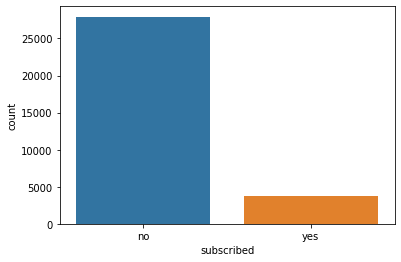

In [70]:
## Checking the bias of data
train['subscribed'].value_counts()/train.shape[0]
sns.countplot(train['subscribed']);

In [71]:
## Here the data is highly biased

# EDA

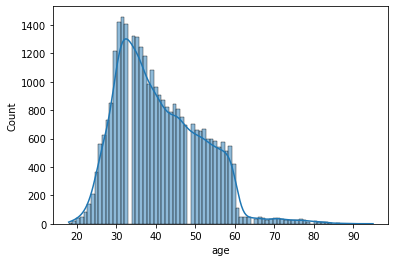

In [72]:
## Age 
sns.histplot(train['age'], kde = True)

In [73]:
## Job
pd.crosstab(train['job'], train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


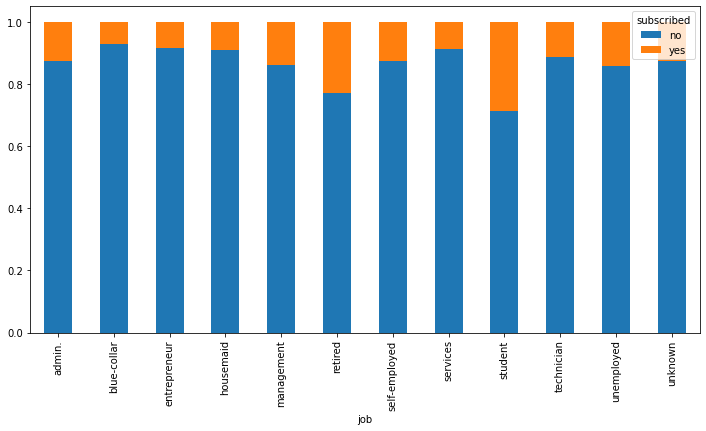

In [74]:
job = pd.crosstab(train['job'], train['subscribed'])
job.div(job.sum(1).astype('float'), axis = 0).plot(kind ='bar', stacked = True, figsize=(12, 6))

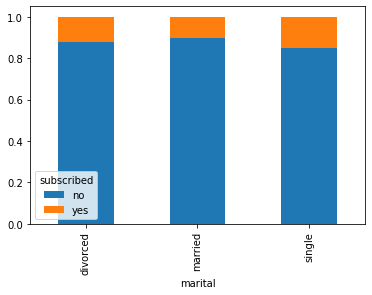

In [75]:
## Marital
marital = pd.crosstab(train['marital'], train['subscribed'])
marital.div(marital.sum(1).astype('float'), axis = 0).plot(kind ='bar', stacked = True, figsize=(6, 4))

In [76]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [77]:
pd.crosstab(train['education'], train['subscribed'])

subscribed,no,yes
education,,
primary,4381,427
secondary,14527,1697
tertiary,7886,1415
unknown,1138,176


In [78]:
## defalt
train['default'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


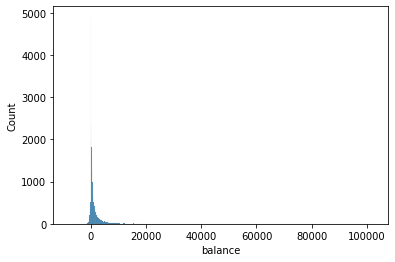

In [80]:
## Balance
sns.histplot(train['balance'])
## It seems to have outliers and balace is also negative 

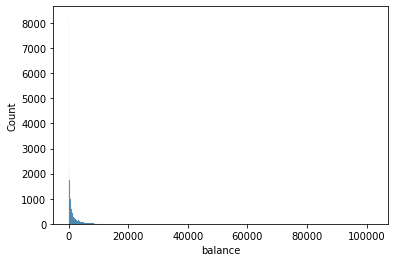

In [81]:
train['balance'] = train['balance'].apply(lambda x : max(0, x))
sns.histplot(train['balance'])

In [82]:
## Let's remove the outliers using interquartile range method

q1 = np.percentile(train['balance'], 25)
q3 = np.percentile(train['balance'], 75)

iqr = q3 - q1

lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

train = train[(train['balance'] > lb) & (train['balance'] < ub)]

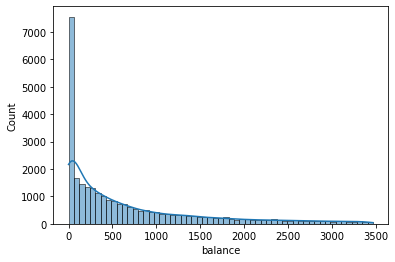

In [83]:
sns.histplot(train['balance'], kde = True)

In [84]:
## Now it looks good
train.shape

(28359, 18)

In [63]:
## Reading the testing data
test = pd.read_csv("https://raw.githubusercontent.com/CaptaiN785/Client-Subscrption/main/test.csv")
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [11]:
test.shape

(13564, 17)